# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [61]:
# Connecting to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Reading the data
df = pd.read_csv('/content/drive/MyDrive/abtest.csv')

# Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [63]:
# Checking first few rows of the data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [64]:
# Checking the last five rows of the data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations:

*   The data contains columns named; user_id, group, landing_page, time_spent_on_the_page, converted and language_preferred.



In [65]:
# Check the data types of the columns in the dataset
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:


*   There are 4 categorical variables, one integer variable and one float variable.
*   There seem to be no null values as all the columns seem to represent 100 rows.

In [66]:
#Checking the shape of data
df.shape

(100, 6)

#### Observations:


*   The data has 100 rows and 6 columns.



In [67]:
# Checking the categorical and numerical summary of the data
df.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Observations: 


*   There are total of 100 entries.
*   The average time spent on the landing page is 5.38 minutes.
*   The standard deviation is 2.38 minutes.



In [110]:
# Checking the summary of group column
df['group'].describe() 

count         100
unique          2
top       control
freq           50
Name: group, dtype: object

#### Observations:

The feature "group" has 2 unique values control and treatment groups.

In [111]:
df['landing_page'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       old
freq       50
Name: landing_page, dtype: object

#### Observations: 

he feature "landing page" also has 2 unique values old and new landing page.

In [112]:
df['converted'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

#### Observations:

The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54.

In [113]:
df['language_preferred'].describe() #outputs the count, unique values, top value, frequency, and data type

count         100
unique          3
top       Spanish
freq           34
Name: language_preferred, dtype: object

In [114]:
df['language_preferred'].unique() #outputs the unique values associated with the feature

array(['Spanish', 'English', 'French'], dtype=object)

#### Observations:

The feature "language preferred" has 3 unique values spanish, english, and french, with french having the highest frequency of 34.

In [68]:
# Checking for null values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:


*   There are no null values.


In [69]:
# Checking for duplicate values
df.duplicated().any()

False

#### Observations:


*   There seem to be no duplicate values in the dataset.



# Univariate Analysis

### Observation on the numerical column 'time spent on the page'

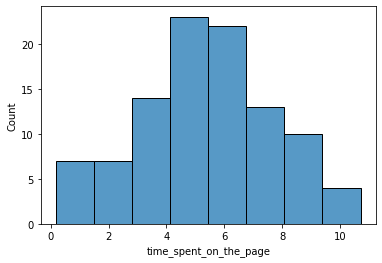

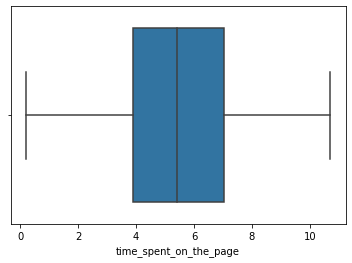

In [70]:
# Visualising the plot for time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Observations:


*   The data seems to follow normal distribution.
*   The average time spent on the page is 5.38 minutes.
*   Standard deviation is 2.38 minutes.
*   There seems to be no outliers present in the variable.



### Observations on the column Group

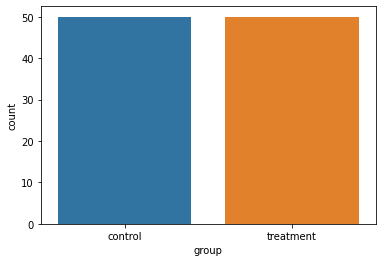

In [71]:
# Visualising the column group
sns.countplot(data=df,x='group')
plt.show()

In [72]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observation:


The feature "group" has 2 unique values control and treatment groups. The groups are split in half. 50 in the control group and 50 in the treatment group.



### Observations on the column 'landing page'

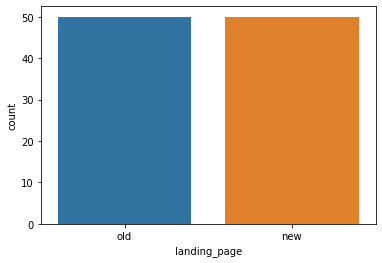

In [73]:
# Visualisation of column landing page
sns.countplot(data=df,x='landing_page')
plt.show()

In [74]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

#### Observation:

The feature "landing page" also has 2 unique values old and new landing page. The data shows 50 observations for the old landing page and 50 observation for the new landing page.

### Observation on the column converted ( users converted after viewing the landing page)

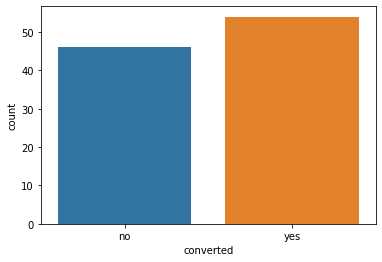

In [75]:
# Visualisation of the column converted
sns.countplot(data=df,x='converted')
plt.show()

In [76]:
df['converted'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

#### Observations:

The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54 and no(converted) with 46.

### Observations on the column language preferred

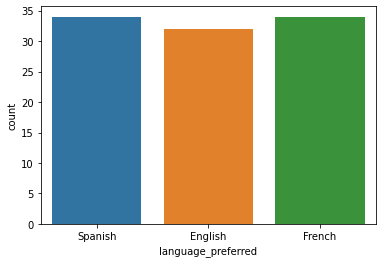

In [77]:
# Visualisation of the coolumn language preferred
sns.countplot(data=df,x='language_preferred')
plt.show()

In [78]:
df['language_preferred'].describe() #outputs the count, unique values, top value, frequency, and data type

count         100
unique          3
top       Spanish
freq           34
Name: language_preferred, dtype: object

In [79]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

#### Observations:

The feature "language preferred" has 3 unique values spanish, english, and french, with both french and spanish having the highest frequencies of 34.

# Bivariate Analysis

### Finding the correlation of the data

In [80]:
# Correlation of the data
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


### Analysing the time spent by the group of people

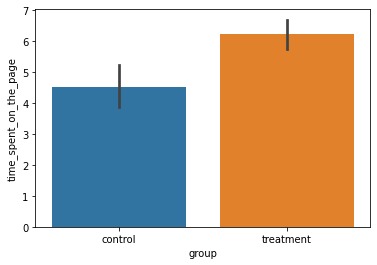

In [81]:
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page');

In [82]:
df.groupby(['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

#### Observations:

The treatment group(those exposed to the new landing page) are more likely to spend more time on the page.

### Analysing the time spent by the users on the landing page

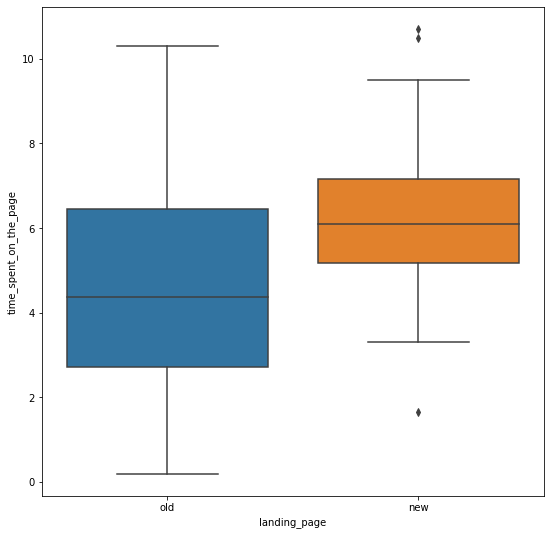

In [83]:
# Analysing the time spent by the users on the landing pages
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

#### Observations:

The same observation from above applies to this one too. Users exposed to the new landing page spend more time on average than those on the old landing page.

### Time spent on the page vs group of people converted after spending time on the landing pages

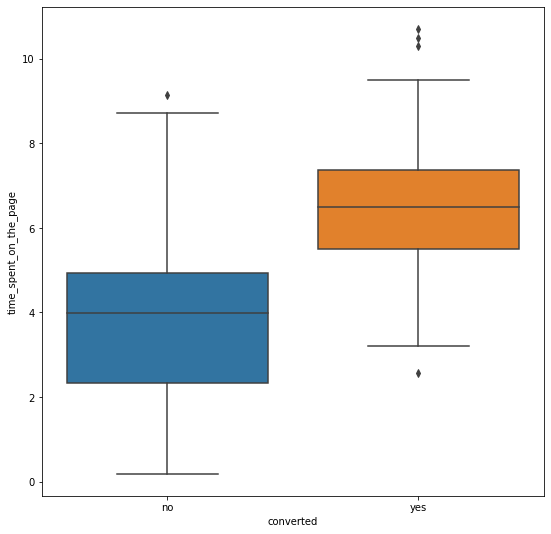

In [84]:
# Visualising the time spent on the page by the group of people
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

In [85]:
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

#### Observations:

Users who converted demonstrate on average a higher time spent on the page

### Visualisation of the users who spent time on the landing pages and what languages they speak

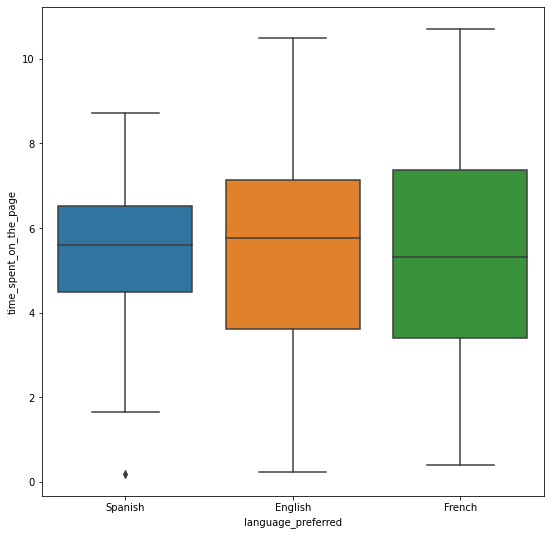

In [86]:
# Visualisation of the users who spent time on the landing pages and what languages they speak
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

In [87]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

#### Observations:

Among the different languages English, French, and Spanish the average time spent on the page seems relatively the same.

### Correlation between languages preferred, group of people converted, and landing pages

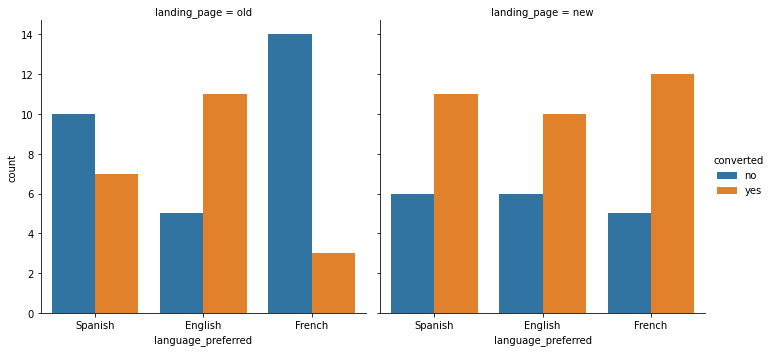

In [88]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count');

#### Observations:

French and Spanish speaking users are less likely to convert to the new landing page if first exposed to the old landing page. Whereas, if they are first exposed to the new landing page they are more likely to convert.

**New landing page**

*  French users show the highest conversion rate
*  Followed by Spanish and the English
*  There is only a very little difference in the total number of users who converted between languages

**Old landing page**

*  French users show the least conversion rate
*  Followed by Spanish and then English
*  The highest conversion rate for the old landing page is by the users who prefer English, followed by Spanish

**Key Insights from EDA**

*  The average time spent on the webportal is around 6 mins
*  On an average more time is spent on the new landing page
*  54/100 users have become subscribers indicates we have subscribers from both the landing pages
*  The number of users are almost the same across the three languages for both new and old landing pages
*  Users' language preferrence is equal for both new and old landing pages
*  On an average, larger number of subscribers prefer English language
*  Above all, the more time a user spends, he/she is likely to become a subscriber, regardless of the landing page/language preferred

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

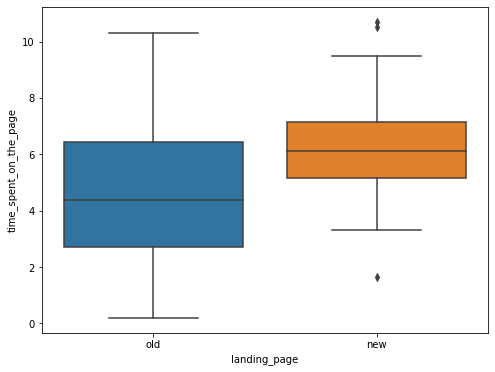

In [89]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

In [90]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

#### Observations:


*   The boxplot suggests that the mean time spent on the new landing page is more than that of the mean time spent in the old page.



### Step 1: Define the null and alternate hypotheses

Let µ1 and µ2 are the time spent in the old landing page and new landing page respectively.

$H_0$: µ1 = µ2

$H_a$: µ1 < µ2

### Step 2: Select Appropriate test

It seems to be the case of one-tailed two sample t-test. So we here will use paired t-test on the problem.

### Step 3: Decide the significance level

We take the significance level as 0.05 (which is 5% significance level).

### Step 4: Collect and prepare data

In [91]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [92]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


#### Observations:

Based on the standard deviation, we can say that the standard deviation is not equal in both the cases.

### Step 5: Calculate the p-value

In [93]:
# Importing the required libraries
import scipy.stats as stats
from scipy.stats import ttest_rel

In [94]:
# find the p-value
test_stat, p_value  = stats.ttest_rel(time_spent_new, time_spent_old, alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

In [95]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the new landing page encourages users to spend more time than on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform visual analysis

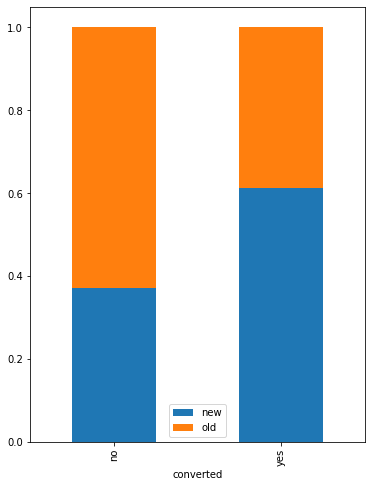

In [96]:
# Code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show();

#### Observations:

Users engaging with new landing page seem to convert more than the users engaging with the old one.

### Step 1 : Let's define the null and alternate hypothesis

Let m1 and m2 be the mean conversion rate for old and new landing pages.

$H_0:$ m1 = m2

$H_a:$  m1 < m2


### Step 2 : Select Appropriate Test

Based on the given data above, we can say that this is one-tailed, proportion test, with two independent populations. So we use two proportion z-test.

### Step 3 : Assigning significance level

As given in the problem statement, we use significance level = 0.05.

### Step 4 : Process and prepare data

In [97]:
# Calculating the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# Calculating the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5 : Finding p-value

In [98]:
# Importing the necessary libraries
from statsmodels.stats.proportion import proportions_ztest  

# Code for calculating the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [99]:
# Conclusion based on the p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate is greater for new landing page

### Conclusion:

In this scenario, the p-value is smaller than 0.05 so we reject the null hypothesis.

Thus we can say that there is enough evidence to say that the conversion rate of the users for new landing page is greater than the conversion rate of users for old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform visual analysis

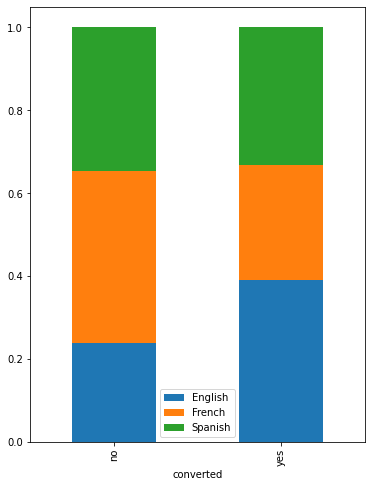

In [100]:
# Visualising 
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show();


### Step 1 : Define null and alternate hypothesis

$H_0:$ Converted status is independent of language preferred

$H_a:$ Converted status depends on language preferred

### Step 2 : Select Appropriate test

As the question is to determine if the converted status depends on the language preferred, I conclude to perform the Chi-Square Test for Independence.

### Step 3: Decide the significance level

As given in the problem statement, we select significance level as 0.05

### Step 4: Collect and prepare data

In [101]:
# Creating a contingency table for two categorical variable
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [102]:
# Importing the required libraries for test
from scipy.stats import chi2_contingency

# Code for calculating the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)  

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [103]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Looking at the p-value, we could see that the value is greater than 0.05 so we could not reject the null hypothesis. Hence we don't have enough statistical evidence to say that converted status depends on language preferrence.

### Conclusion:


In this scenario, the p value is 0.213 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the converted status is independent of language preferred.

## 4. Is the time spent on the new page same for the different language users?

In [104]:
# Creating a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

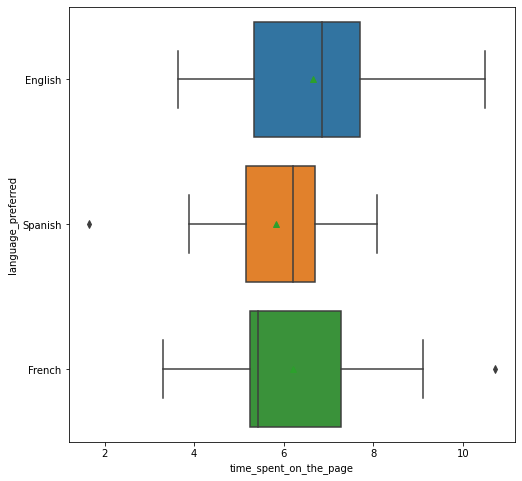

In [105]:
# Visualising the plot for the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show();

In [106]:
# Calculating the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

#### Observations:

The average time spent on the pages seems relatively the same among the different language preferences.

### Step 1: Define the null and alternate hypothesis

$H_0:$ µ1 = µ2 = µ3

$H_a:$ At least one time average of the new landing page is different among the language preferences.


### Step 2: Select Appropriate test

The question is based on the mean time spent on the new page by three different language users. Basically it is a test for means for more than two populations, I conclude to perform the One-way ANOVA F-test.

### Step 3: Decide the significance level

As defined in the stated problem, the significance level selected is 0.05

### Step 4: Collect and prepare data

In [107]:
# Create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# Create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']  
time_spent_Spanish = df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']   

### Step 5: Calculate the p-value

In [108]:
# Importing the necessary libraries
from scipy.stats import f_oneway 

# Calculating p-values
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [109]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that at least one time average on the new landing page is different among the language preferences.

### Conclusion:

In this scenario, the p value is 0.432 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the time averages on the new landing page for the different languages are relatively the same.

## Conclusion and Business Recommendations

**Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the mean time spent on the new page for the different language users are same.**

### Conclusion:
From the statistical and visual analysis performed, we can conclude that at a 5% significance level

*  The users spend more time on the new landing page than the old landing page

*  The conversion rate for the new page is greater than the conversion rate for the old page

*  The converted status does not depend on the language preferred

*  The mean time spent on the new page is the same for the different language users

All things considered, there is enough statistical and visual evidence to prove that the business would improve significantly with the launch of the new landing page.

___